# 🎯 K-MEANS CLUSTERING in Google Colab

Simple step-by-step tutorial - Run each cell!

**First time?** Just click the ▶ button on each cell from top to bottom.

---

## STEP 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


---

## STEP 2: Upload Your Data File

Click the upload button and select: `cleaned_health_data.csv`

In [ ]:
# For local execution, use the correct path
filename = '../data/output/cleaned_health_data.csv'
print(f"Using file: {filename}")

In [ ]:
# For Google Colab users, uncomment the following:
# from google.colab import files
# print("📁 Upload your CSV file (cleaned_health_data.csv)")
# print("Click 'Choose Files' button below:")
# uploaded = files.upload()
# filename = list(uploaded.keys())[0]

# For local users, the filename is already set above
print(f"✓ Using local file: {filename}")

---

## STEP 3: Load Data

In [12]:
# Load the data
df = pd.read_csv(filename, on_bad_lines='skip')

print(f"✓ Data loaded successfully!")
print(f"\n📊 Data shape: {df.shape}")
print(f"   Rows (Counties): {df.shape[0]}")
print(f"   Columns (Features): {df.shape[1]}")
print(f"\n📋 First few columns:")
print(df.columns[:10].tolist())

✓ Data loaded successfully!

📊 Data shape: (2275, 45)
   Rows (Counties): 2275
   Columns (Features): 45

📋 First few columns:
['FIPS', 'State', 'County', '% Adults with Obesity', '% Adults with Diabetes', 'Average Number of Physically Unhealthy Days', 'Food Environment Index', '80th Percentile Income', '20th Percentile Income', 'Income Ratio']


---

## STEP 4: Select Features for Clustering

In [13]:
# Pick the features (using normalized versions - already standardized)
features_to_use = [
    '% Adults with Obesity_normalized',
    '% Adults with Diabetes_normalized',
    'Food Environment Index_normalized',
    'Income Ratio_normalized',
    '% Children in Poverty_normalized',
]

print("🎯 Features selected for clustering:")
for i, feat in enumerate(features_to_use, 1):
    print(f"   {i}. {feat}")

# Get only these features
X = df[features_to_use].dropna()

print(f"\n✓ Data prepared")
print(f"   Counties with complete data: {len(X)}")
print(f"   Features: {X.shape[1]}")

🎯 Features selected for clustering:
   1. % Adults with Obesity_normalized
   2. % Adults with Diabetes_normalized
   3. Food Environment Index_normalized
   4. Income Ratio_normalized
   5. % Children in Poverty_normalized

✓ Data prepared
   Counties with complete data: 2236
   Features: 5


---

## STEP 5: Run K-Means Clustering (THE MAIN STEP!)

In [14]:
# THIS IS WHERE THE MAGIC HAPPENS! ✨

print("⚙️ Running K-Means with k=5...")

kmeans = KMeans(
    n_clusters=5,        # Make 5 clusters
    random_state=42,     # Reproducible results
    n_init=10            # Try 10 different starting points
)

# Fit the model
kmeans.fit(X)
clusters = kmeans.labels_

print("\n✓ K-Means Complete!")
print(f"✓ Found 5 clusters")
print(f"✓ Inertia: {kmeans.inertia_:.2f}")

⚙️ Running K-Means with k=5...

✓ K-Means Complete!
✓ Found 5 clusters
✓ Inertia: 4345.34


---

## STEP 6: Add Clusters to Original Data

In [15]:
# Add cluster labels to original data
df_clustered = df.loc[X.index].copy()
df_clustered['Cluster'] = clusters

print("✓ Cluster column added to data\n")
print("📊 Sample results (first 10 counties):")
print(df_clustered[['County', 'State', '% Adults with Obesity', 'Cluster']].head(10).to_string())

✓ Cluster column added to data

📊 Sample results (first 10 counties):
     County    State  % Adults with Obesity  Cluster
0   Autauga  Alabama                   38.4        2
1   Barbour  Alabama                   43.8        4
2      Bibb  Alabama                   41.4        2
3    Blount  Alabama                   37.3        3
4    Butler  Alabama                   45.5        4
5   Calhoun  Alabama                   38.3        4
6  Chambers  Alabama                   45.4        4
7  Cherokee  Alabama                   40.2        2
8   Chilton  Alabama                   36.3        3
9   Choctaw  Alabama                   45.8        4


---

## STEP 7: Analyze Clusters

In [16]:
print("📈 CLUSTER ANALYSIS\n")
print("="*70)

for cluster_id in range(5):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    n_counties = len(cluster_data)
    pct = n_counties / len(df_clustered) * 100

    obesity = cluster_data['% Adults with Obesity'].mean()
    diabetes = cluster_data['% Adults with Diabetes'].mean()
    poverty = cluster_data['% Children in Poverty'].mean()
    food_env = cluster_data['Food Environment Index'].mean()

    print(f"\nCLUSTER {cluster_id}: {n_counties} counties ({pct:.1f}%)")
    print(f"  Obesity: {obesity:.1f}%")
    print(f"  Diabetes: {diabetes:.1f}%")
    print(f"  Child Poverty: {poverty:.1f}%")
    print(f"  Food Environment: {food_env:.2f}")

print("\n" + "="*70)

📈 CLUSTER ANALYSIS


CLUSTER 0: 594 counties (26.6%)
  Obesity: 39.4%
  Diabetes: 10.0%
  Child Poverty: 13.6%
  Food Environment: 8.22

CLUSTER 1: 321 counties (14.4%)
  Obesity: 33.4%
  Diabetes: 8.7%
  Child Poverty: 12.8%
  Food Environment: 8.32

CLUSTER 2: 565 counties (25.3%)
  Obesity: 40.4%
  Diabetes: 12.2%
  Child Poverty: 22.1%
  Food Environment: 6.97

CLUSTER 3: 440 counties (19.7%)
  Obesity: 35.9%
  Diabetes: 10.0%
  Child Poverty: 18.6%
  Food Environment: 7.24

CLUSTER 4: 316 counties (14.1%)
  Obesity: 42.4%
  Diabetes: 13.8%
  Child Poverty: 28.9%
  Food Environment: 6.52



---

## STEP 8: Visualize Clusters

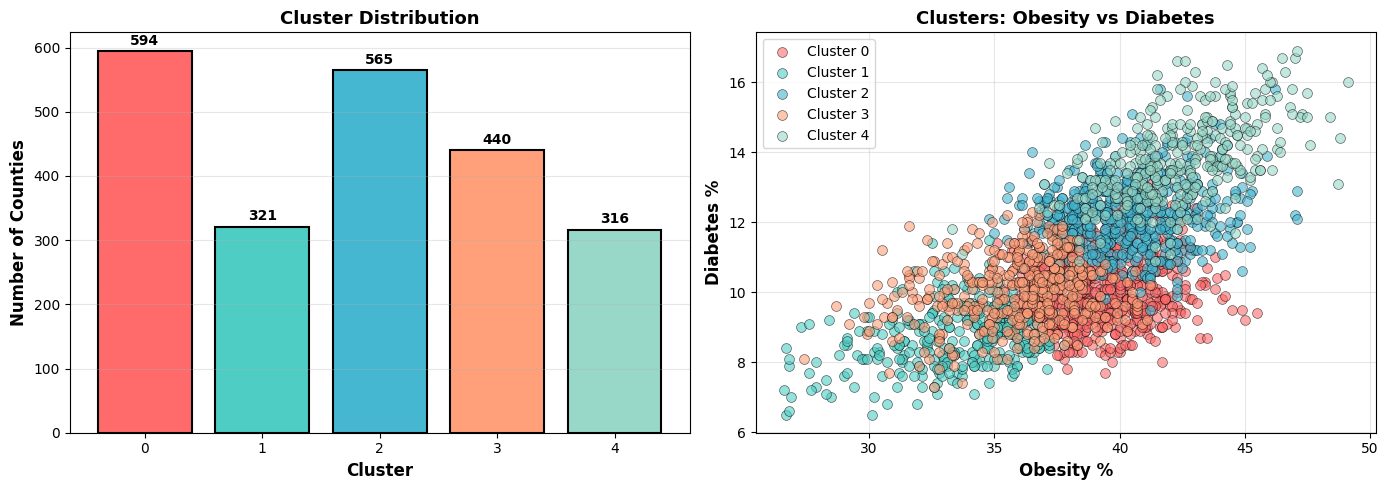

✓ Visualization complete!


In [17]:
# Plot 1: Cluster Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart - cluster sizes
cluster_counts = pd.Series(clusters).value_counts().sort_index()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
axes[0].bar(cluster_counts.index, cluster_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Cluster', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Counties', fontsize=12, fontweight='bold')
axes[0].set_title('Cluster Distribution', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(cluster_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Scatter - Obesity vs Diabetes (colored by cluster)
for cluster_id in range(5):
    data = df_clustered[df_clustered['Cluster'] == cluster_id]
    axes[1].scatter(data['% Adults with Obesity'],
                   data['% Adults with Diabetes'],
                   label=f'Cluster {cluster_id}',
                   s=50, alpha=0.6, color=colors[cluster_id], edgecolors='black', linewidth=0.5)

axes[1].set_xlabel('Obesity %', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Diabetes %', fontsize=12, fontweight='bold')
axes[1].set_title('Clusters: Obesity vs Diabetes', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualization complete!")

---

## STEP 9: Disease Outcomes by Cluster

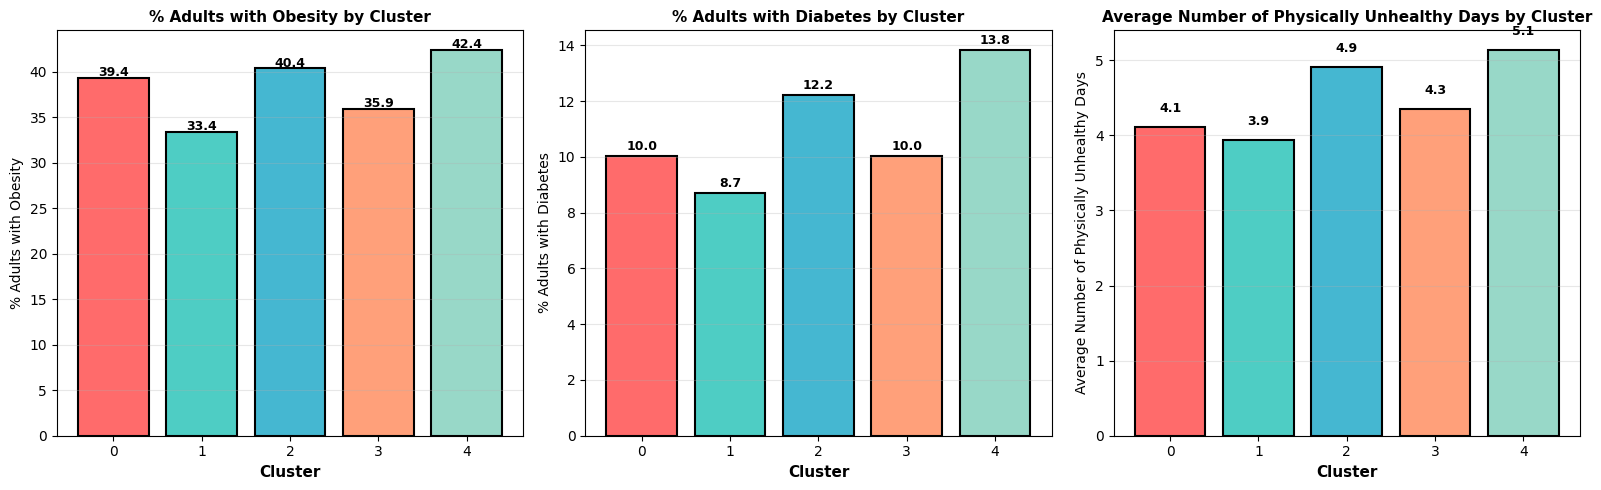

✓ Disease comparison complete!


In [18]:
# Compare disease metrics across clusters
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

metrics = ['% Adults with Obesity', '% Adults with Diabetes', 'Average Number of Physically Unhealthy Days']

for idx, metric in enumerate(metrics):
    cluster_means = df_clustered.groupby('Cluster')[metric].mean()
    axes[idx].bar(cluster_means.index, cluster_means.values, color=colors, edgecolor='black', linewidth=1.5)
    axes[idx].set_xlabel('Cluster', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(metric, fontsize=10)
    axes[idx].set_title(f'{metric} by Cluster', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')

    # Add value labels
    for i, v in enumerate(cluster_means.values):
        axes[idx].text(i, v + 0.2, f'{v:.1f}', ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("✓ Disease comparison complete!")

---

## STEP 10: Find Counties in a Specific Cluster

In [19]:
# EXAMPLE: Find worst counties (Cluster 4 if available)

print("🔍 FINDING COUNTIES IN EACH CLUSTER\n")

# Find the cluster with highest obesity
avg_obesity_by_cluster = df_clustered.groupby('Cluster')['% Adults with Obesity'].mean()
worst_cluster = avg_obesity_by_cluster.idxmax()

print(f"Cluster {worst_cluster} has HIGHEST obesity ({avg_obesity_by_cluster[worst_cluster]:.1f}%)\n")

# Get top 10 worst counties in that cluster
worst_counties_cluster = df_clustered[df_clustered['Cluster'] == worst_cluster]
worst_10 = worst_counties_cluster.nlargest(10, '% Adults with Obesity')[['County', 'State', '% Adults with Obesity', '% Adults with Diabetes']]

print(f"Top 10 Worst Counties (Cluster {worst_cluster}):")
print(worst_10.to_string(index=False))

🔍 FINDING COUNTIES IN EACH CLUSTER

Cluster 4 has HIGHEST obesity (42.4%)

Top 10 Worst Counties (Cluster 4):
      County          State  % Adults with Obesity  % Adults with Diabetes
         Lee South Carolina                   49.1                    16.0
    Thurston       Nebraska                   48.8                    14.4
       Meigs           Ohio                   48.7                    13.1
  St. Landry      Louisiana                   48.4                    15.0
      Hughes       Oklahoma                   47.6                    14.2
     Wheeler        Georgia                   47.5                    15.7
    Hardeman      Tennessee                   47.5                    15.0
   Chickasaw    Mississippi                   47.3                    15.1
      Kemper    Mississippi                   47.2                    15.0
Emporia City       Virginia                   47.1                    16.9


---

## STEP 11: Find Counties in Your State (Change 'Texas' to your state)

In [20]:
# CHANGE THIS: Replace 'Texas' with your state
YOUR_STATE = 'Texas'  # ← Change this!

# Get counties from your state
your_state_data = df_clustered[df_clustered['State'] == YOUR_STATE]

if len(your_state_data) > 0:
    print(f"\n📍 {YOUR_STATE} Counties by Cluster:\n")

    # Show cluster distribution
    for cluster_id in range(5):
        count = len(your_state_data[your_state_data['Cluster'] == cluster_id])
        if count > 0:
            print(f"  Cluster {cluster_id}: {count} counties")

    # Show sample counties
    print(f"\n📋 Sample {YOUR_STATE} counties:")
    print(your_state_data[['County', 'State', '% Adults with Obesity', 'Cluster']].head(15).to_string(index=False))
else:
    print(f"❌ {YOUR_STATE} not found in data")
    print("\nAvailable states:")
    print(sorted(df_clustered['State'].unique()))


📍 Texas Counties by Cluster:

  Cluster 0: 11 counties
  Cluster 1: 6 counties
  Cluster 2: 58 counties
  Cluster 3: 26 counties
  Cluster 4: 29 counties

📋 Sample Texas counties:
   County State  % Adults with Obesity  Cluster
 Anderson Texas                   39.5        2
 Angelina Texas                   41.1        2
  Aransas Texas                   40.3        4
   Archer Texas                   36.1        3
Armstrong Texas                   34.4        3
   Austin Texas                   36.3        3
  Bandera Texas                   36.0        3
   Baylor Texas                   35.9        3
      Bee Texas                   43.0        4
   Blanco Texas                   34.8        1
   Borden Texas                   33.2        1
   Bosque Texas                   37.0        2
    Bowie Texas                   40.9        2
    Brown Texas                   38.3        2
 Burleson Texas                   38.4        2


---

## STEP 12: Save Results to CSV

In [ ]:
# Save your clustered data
output_filename = '../data/output/counties_with_clusters.csv'
df_clustered.to_csv(output_filename, index=False)

print(f"✓ Results saved to: {output_filename}")
print(f"✓ Total rows: {len(df_clustered)}")
print(f"✓ Columns: {df_clustered.shape[1]}")
print(f"\n✓ New 'Cluster' column added to data")

---

## STEP 13: Download Results



### Try These:
- Change `YOUR_STATE` to analyze different states
- Change `n_clusters=5` to try k=3 or k=7
- Change the features to try different clustering

--
